In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statistics import mean, median
import re

In [2]:
# Function to extract average temperature from thermo.log
def extract_average_temperature(init_idx, base_directory):
    folder_path = f'{base_directory}{init_idx}'
    log_file_path = os.path.join(folder_path, 'thermo.log')

    if not os.path.exists(log_file_path):
        print(f"thermo.log not found for init_idx {init_idx}")
        return None

    try:
        log_data = pd.read_csv(log_file_path, sep='\s+')
        if 'T[K]' in log_data.columns:
            temperatures = log_data['T[K]'].tolist()
            return mean(temperatures)
        else:
            print(f"No 'temperature' column found in thermo.log for init_idx {init_idx}")
            return None
    except Exception as e:
        print(f"Error reading thermo.log for init_idx {init_idx}: {e}")
        return None

412.684131736527
539.4339321357286


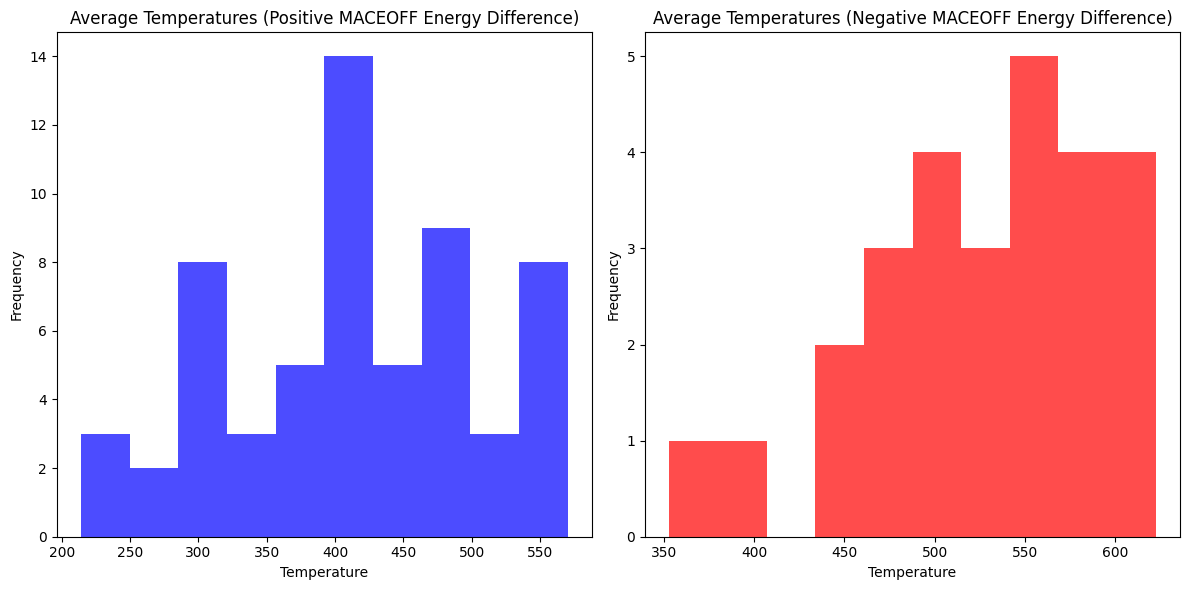

In [3]:
# Load the CSV file
df = pd.read_csv('records_str_atoms_leq_6.csv')

# Lists to store temperatures for positive and negative MACEOFF energy differences
positive_diff_temps = []
negative_diff_temps = []

# Loop through each row in the CSV file
for idx, row in df.iterrows():
    init_idx = str(row['init_idx'])
    maceoff_energy_diff = row['maceoff_energy_off_by_meV']

    # Get the average temperature for this init_idx
    base_directory = '../MODELPATH/maceoff_split_gemnet_dT_results/md_25ps_123_init_'
    avg_temp = extract_average_temperature(init_idx, base_directory)

    if avg_temp is not None:
        # Classify the temperatures based on MACEOFF energy difference
        if maceoff_energy_diff > 0:
            positive_diff_temps.append(avg_temp)
        else:
            negative_diff_temps.append(avg_temp)

print(median(positive_diff_temps))
print(median(negative_diff_temps))

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Histogram for positive energy differences
plt.subplot(1, 2, 1)
plt.hist(positive_diff_temps, bins=10, color='blue', alpha=0.7)
plt.title('Average Temperatures (Positive MACEOFF Energy Difference)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Histogram for negative energy differences
plt.subplot(1, 2, 2)
plt.hist(negative_diff_temps, bins=10, color='red', alpha=0.7)
plt.title('Average Temperatures (Negative MACEOFF Energy Difference)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()

In [8]:
# Load the CSV file
df = pd.read_csv('records_gemnet_t_dt_30k.csv')

# Extract a specific column (e.g., 'column_name')
column_values = df['init_idx']

# Write the column values to a text file
with open('init_idx_30k.txt', 'w') as f:
    for value in column_values:
        f.write(f"{value}\n")

In [7]:
df1 = pd.read_csv('records_gemnet_t_dt_30k.csv')
df2 = pd.read_csv('records_gemnet_t_dt_100k.csv')
df3 = pd.read_csv('records_gemnet_fulldt_maceoff.csv')
numbers1 = df1['init_idx']
numbers2 = df2['init_idx']
numbers3 = df3['init_idx']

# Find the intersection by chaining .isin() checks
# common_numbers = numbers1[numbers1.isin(numbers2) & numbers1.isin(numbers3)]
common_numbers = numbers1[numbers1.isin(numbers2)]
print(common_numbers)
print(len(common_numbers))

# common_numbers.to_csv('intersection_30k_100k_full.txt', index=False, header=False)

1      2014
2      2060
3      2513
4      2886
5      3307
6      3573
7      6202
8      7738
10     9102
11     9803
12    10844
13    10924
14    12131
15    14747
16    15094
17    19508
18    24024
19    27561
21    37758
22    39719
23    43011
24    49489
Name: init_idx, dtype: int64
22


In [3]:
# average energy deviation on simulations
def average_energy_deviation(txt_file_path, name1, name2):
    with open(txt_file_path, 'r') as f:
        file_content = f.read()
        
    # Extract energy deviations
    dt_deviations = [float(value) for value in re.findall(rf"{name1}.*?energy is off by ([\d\.\-]+) meV", file_content, re.DOTALL)]
    t_deviations = [float(value) for value in re.findall(rf"{name2}.*?energy is off by ([\d\.\-]+) meV", file_content, re.DOTALL)]
    
    # Calculate average of absolute deviations
    num_dt = len(dt_deviations)
    num_t = len(t_deviations)

    avg_dt_deviation = sum(abs(dev) for dev in dt_deviations) / num_dt if num_dt > 0 else None
    avg_t_deviation = sum(abs(dev) for dev in t_deviations) / num_t if num_t > 0 else None

    # Output results
    print(f"Average absolute energy deviation for {name1}: {avg_dt_deviation} meV over {num_dt} molecules")
    print(f"Average absolute energy deviation for {name2}: {avg_t_deviation} meV over {num_t} molecules")

In [4]:
# average energy deviation on simulations, but for a file with just one model
def average_energy_deviation_one_model(txt_file_path, name1):
    with open(txt_file_path, 'r') as f:
        file_content = f.read()
        
    # Extract energy deviations
    deviations = [float(value) for value in re.findall(rf"{name1}.*?energy is off by ([\d\.\-]+) meV", file_content, re.DOTALL)]
    
    # Calculate average of absolute deviations
    num = len(deviations)

    avg_deviation = sum(abs(dev) for dev in deviations) / num if num > 0 else None

    # Output results
    print(f"Average absolute energy deviation for {name1}: {avg_deviation} meV over {num} molecules")


In [5]:
average_energy_deviation('records_gemnet_t_dt_30k.txt', 'GEMNET-DT CHECKPOINT', 'GEMNET-T CHECKPOINT')

Average absolute energy deviation for GEMNET-DT CHECKPOINT: 636.3307305772045 meV over 21 molecules
Average absolute energy deviation for GEMNET-T CHECKPOINT: 210.1588326627496 meV over 21 molecules


In [6]:
average_energy_deviation_one_model('records_gemnet_t_fulldataset.txt', 'GEMNET-T CHECKPOINT')

Average absolute energy deviation for GEMNET-T CHECKPOINT: 176.62092779585237 meV over 72 molecules


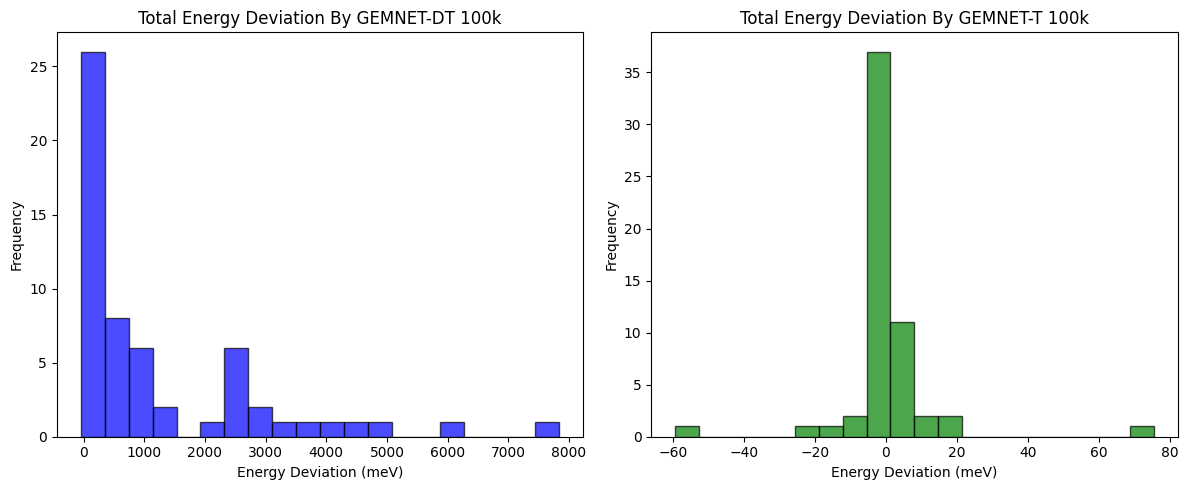

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data file
size = "100k"
file_path = f'total_energy_deviation_{size}.txt'
data = pd.read_csv(file_path, delimiter='\t')

# Convert the columns to numeric, removing the "meV" suffix
data['Total Energy Off By GEMNET-DT (meV)'] = data['Total Energy Off By GEMNET-DT (meV)'].str.replace(' meV', '').astype(float)
data['Total Energy Off By GEMNET-T (meV)'] = data['Total Energy Off By GEMNET-T (meV)'].str.replace(' meV', '').astype(float)

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for GEMNET-DT
plt.subplot(1, 2, 1)
plt.hist(data['Total Energy Off By GEMNET-DT (meV)'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title(f'Total Energy Deviation By GEMNET-DT {size}')
plt.xlabel('Energy Deviation (meV)')
plt.ylabel('Frequency')

# Histogram for GEMNET-T
plt.subplot(1, 2, 2)
plt.hist(data['Total Energy Off By GEMNET-T (meV)'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title(f'Total Energy Deviation By GEMNET-T {size}')
plt.xlabel('Energy Deviation (meV)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [11]:
# Read the text file with init_idx and molecule names
molecule_dict = {}
with open('str_atoms_leq_6.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            init_idx = parts[0]
            molecule_name = parts[1]
            molecule_dict[init_idx] = molecule_name

# Filter rows with absolute value > 2000 in 'Total Energy Off By GEMNET-DT (meV)'
filtered_df = data[data['Total Energy Off By GEMNET-DT (meV)'].abs() > 2000]

# Add a new column for the molecule name based on init_idx
filtered_df['molecule'] = filtered_df['init_idx'].map(molecule_dict)

# Display the results
print(filtered_df[['init_idx', 'molecule', 'Total Energy Off By GEMNET-DT (meV)']])

   init_idx molecule  Total Energy Off By GEMNET-DT (meV)
1       954   C20H24                          2203.647719
2      1211   Cl8C10                          2525.639275
7      2513   O2C9H6                          3595.548715
8      2759   C17H22                          5950.970449
15     5104   C11H12                          4102.049483
18     5720   O2C4H8                          2387.705923
22     6855     C8H8                          2815.209304
23     6916    C8H14                          2528.625841
29    10881   C20H16                          7842.933715
36    15190   C13H14                          2513.445312
37    15819    C9H12                          5067.159326
38    15849   S3C8H4                          2621.518255
47    29626   OC5H10                          2615.425285
52    39503   ClC7H9                          3128.875034
55    44599   C11H10                          4551.658921
56    44700   C22H16                          3046.898527


/tmp/ipykernel_2963623/211039820.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['molecule'] = filtered_df['init_idx'].map(molecule_dict)
/tmp/ipykernel_2963623/211039820.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['molecule'] = other_df['init_idx'].map(molecule_dict)


In [15]:
other_df = data[data['Total Energy Off By GEMNET-DT (meV)'].abs() > 3000]
other_df['molecule'] = other_df['init_idx'].map(molecule_dict)
print(other_df[['init_idx', 'molecule', 'Total Energy Off By GEMNET-DT (meV)']])

   init_idx molecule  Total Energy Off By GEMNET-DT (meV)
7      2513   O2C9H6                          3595.548715
8      2759   C17H22                          5950.970449
15     5104   C11H12                          4102.049483
29    10881   C20H16                          7842.933715
37    15819    C9H12                          5067.159326
52    39503   ClC7H9                          3128.875034
55    44599   C11H10                          4551.658921
56    44700   C22H16                          3046.898527


/tmp/ipykernel_2963623/1444180539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['molecule'] = other_df['init_idx'].map(molecule_dict)


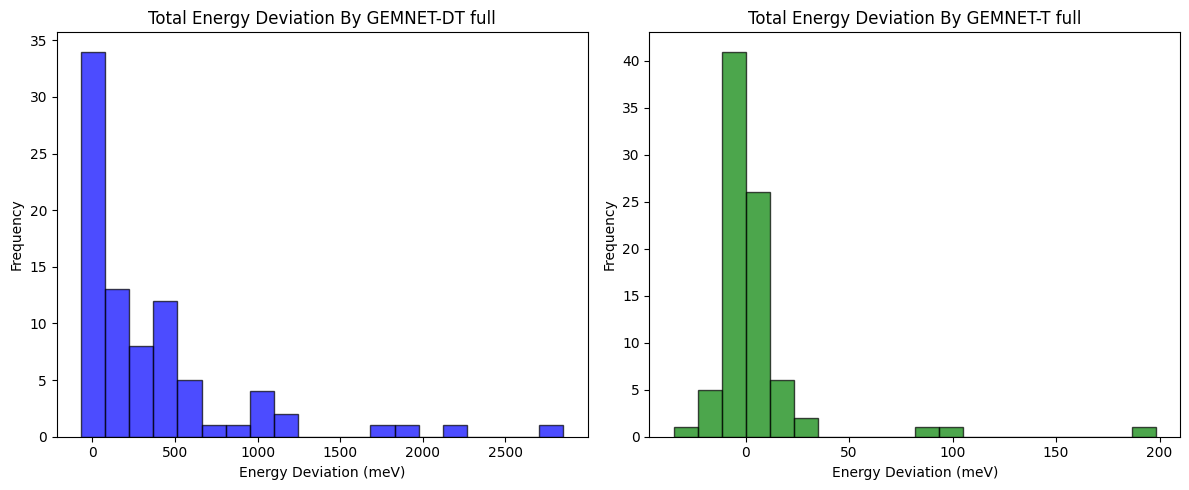

In [23]:
# Load the data file
file_path = f'total_energy_deviation_full.txt'
data = pd.read_csv(file_path, delimiter='\t')

# Convert the columns to numeric, removing the "meV" suffix
data['Total Energy Off By GEMNET-DT (meV)'] = data['Total Energy Off By GEMNET-DT (meV)'].str.replace(' meV', '').astype(float)
data['Total Energy Off By GEMNET-T CHECKPOINT (meV)'] = data['Total Energy Off By GEMNET-T CHECKPOINT (meV)'].str.replace(' meV', '').astype(float)

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for GEMNET-DT
plt.subplot(1, 2, 1)
plt.hist(data['Total Energy Off By GEMNET-DT (meV)'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title(f'Total Energy Deviation By GEMNET-DT full')
plt.xlabel('Energy Deviation (meV)')
plt.ylabel('Frequency')

# Histogram for GEMNET-T
plt.subplot(1, 2, 2)
plt.hist(data['Total Energy Off By GEMNET-T CHECKPOINT (meV)'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title(f'Total Energy Deviation By GEMNET-T full')
plt.xlabel('Energy Deviation (meV)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [1]:
# Paths to the input files
numbers_file = 'intersection_30k_100k_full.txt'
molecules_file = 'str_atoms_leq_6.txt'
output_file = 'intersection_with_molecules.txt'

# Read numbers from the first file into a set for quick lookup
with open(numbers_file, 'r') as f:
    numbers_to_find = set(int(line.strip()) for line in f)

# Read the molecules file and look up the numbers
matched_pairs = []
with open(molecules_file, 'r') as f:
    for line in f:
        parts = line.split()
        num = int(parts[0])  # first part is the number
        molecule = ' '.join(parts[1:])  # remaining parts are the molecule name
        if num in numbers_to_find:
            matched_pairs.append((num, molecule))

# Write the matched numbers and molecules to an output file
with open(output_file, 'w') as f:
    for num, molecule in matched_pairs:
        f.write(f"{num}\t{molecule}\n")

print("Matched numbers and molecules have been written to", output_file)


Matched numbers and molecules have been written to intersection_with_molecules.txt


In [16]:
# Read file1 into a dictionary with init_idx as the key and molecule as the value
file1_data = {}
with open('molecules_less_than_12.txt', 'r') as f1:
    for line in f1:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            init_idx = int(parts[0])
            molecule = parts[1]
            file1_data[init_idx] = molecule

# Read file2 into a set of init_idx values
file2_indices = set()
with open('str_atoms_leq_6.txt', 'r') as f2:
    for line in f2:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            init_idx = int(parts[0])
            file2_indices.add(init_idx)

# Get entries in file1 that are not in file2
filtered_data = {idx: mol for idx, mol in file1_data.items() if idx not in file2_indices}

# Write the filtered data to a new file
with open('filtered_molecules_less_than_12.txt', 'w') as output_file:
    for idx, mol in filtered_data.items():
        output_file.write(f"{idx} {mol}\n")

print("Filtered file has been created with entries from file1 that are not in file2.")

Filtered file has been created with entries from file1 that are not in file2.


In [12]:
# Load the CSV file
df = pd.read_csv('test_set_losses.csv')

# Sort by the 'force loss (meV)' column in ascending order
df_sorted = df.sort_values(by='force loss (meV)', ascending=True)

# Select the top rows
top_rows = df_sorted.head(1000)
print(top_rows)

# Extract only the 'init_idx' column from the top sorted rows
init_idx_column = top_rows['init_idx']

# Write the 'init_idx' values to a text file, each on a new line
init_idx_column.to_csv('least_force_loss_init_idx.txt', index=False, header=False)

       init_idx  energy loss  force loss (meV)
47127     15991    72.196036          1.069266
46192     31159    72.161050          1.118146
35660      1383    72.160219          1.145550
33367     40738    72.334356          1.161012
31593     17078    59.651055          1.185723
...         ...          ...               ...
39449     37899    93.487918          4.397362
32469     17655    74.018190          4.402275
7609      32390    64.379019          4.406378
33203     16711    84.754641          4.408117
23407      3852    52.672341          4.408426

[1000 rows x 3 columns]
